In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/ratings_with_titles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()


,user_id,movie_id,rating,timestamp,title,release_date,release_year
0,196,242,3.0,1997-12-04 15:55:49,Kolya (1996),1997-01-24,1997.0
1,186,302,3.0,1998-04-04 19:22:22,L.A. Confidential (1997),1997-01-01,1997.0
2,22,377,1.0,1997-11-07 07:18:36,Heavyweights (1994),1994-01-01,1994.0
3,244,51,2.0,1997-11-27 05:02:03,Legends of the Fall (1994),1994-01-01,1994.0
4,166,346,1.0,1998-02-02 05:33:16,Jackie Brown (1997),1997-01-01,1997.0


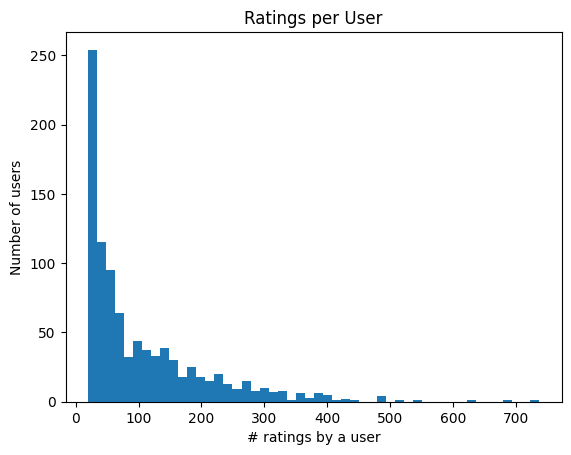

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64

In [2]:
ratings_per_user = df.groupby("user_id")["rating"].count()

plt.hist(ratings_per_user, bins=50)
plt.title("Ratings per User")
plt.xlabel("# ratings by a user")
plt.ylabel("Number of users")
plt.show()

ratings_per_user.describe()


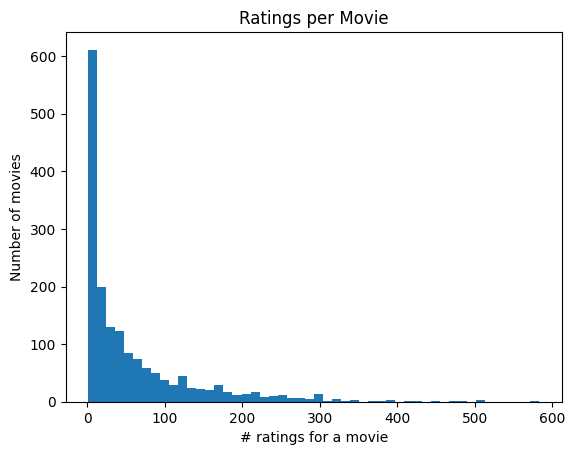

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64

In [3]:
ratings_per_movie = df.groupby("movie_id")["rating"].count()

plt.hist(ratings_per_movie, bins=50)
plt.title("Ratings per Movie")
plt.xlabel("# ratings for a movie")
plt.ylabel("Number of movies")
plt.show()

ratings_per_movie.describe()


In [4]:
num_users = df["user_id"].nunique()
num_movies = df["movie_id"].nunique()
num_ratings = len(df)

density = num_ratings / (num_users * num_movies)
sparsity = 1 - density

print("Users:", num_users)
print("Movies:", num_movies)
print("Ratings:", num_ratings)
print(f"Density: {density:.6f}")
print(f"Sparsity: {sparsity:.6f}")


Users: 943
Movies: 1682
Ratings: 100000
Density: 0.063047
Sparsity: 0.936953


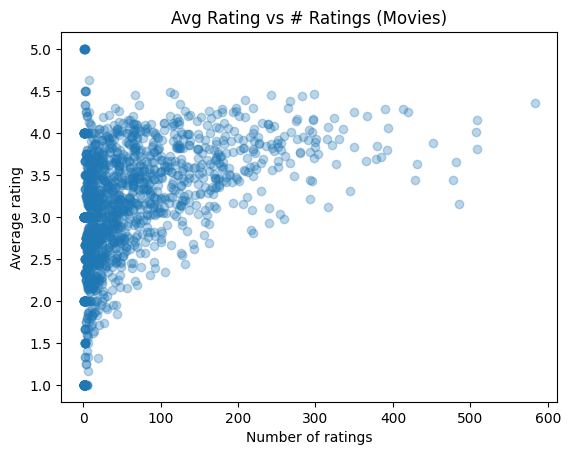

In [5]:
movie_stats = df.groupby("title").agg(
    num_ratings=("rating", "count"),
    avg_rating=("rating", "mean")
)

plt.scatter(movie_stats["num_ratings"], movie_stats["avg_rating"], alpha=0.3)
plt.title("Avg Rating vs # Ratings (Movies)")
plt.xlabel("Number of ratings")
plt.ylabel("Average rating")
plt.show()


Insights: 

- While the median user has rated 65 movies, which is a strong signal for personalization, users with relatively few ratings still exist, which can indicate a cold-start challenge for new or inactive users. 

- Most movies have low rating counts as the median ratings per movie is 27. The data is right-skewed and has a long tail. This imbalance explains why popularity-based baselines are strong and highlights the challenge of recommending less-popular items. 

- Matrix is ~94% sparse which means that algorithms will be needed which means that most user-item pairs are unobserved. This level of sparsity necessitates recommender-specific algorithms such as collaborative filtering rather than traditional supervised learning approaches. 

- Thresholding is necessary to avoid misleading averages. Average ratings by themselves are misleading for sparsely rated movies. Applying minimum-rating thresholds is necessary to reduce variance and avoid over-ranking items with insufficient data. 


